<h1><center>HW 3: Build Twitter Networks</center></h1>


### Q1. Scrape the follower-followee network by companies.

    * Define a function to retrieve the follower-followee network of a list of twenty accounts of U.S. FT companies.
    * The input will be a list of Twitter screen names.
    * The output will be a dataframe with this list of accounts as row index and column index, and 1 and 0 as values.
    * Note: this will take some time because Twitter API will force you to sleep.


In [15]:
import time
import datetime
import tweepy
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import numpy as np
import re
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [16]:
CONSUMER_KEY = 'wkgxq9I9ixUXd0lhOaEqOWdXq'
CONSUMER_SECRET = 'BsguyN5f1RY3eqJH5Jb3dtgoGRDni4cJ5BO26V6iI3dlPcoFXj'
ACCESS_KEY = '1572007702737424389-mBDazpwiGLFuY3hew7qeFoIqrpYODF'
ACCESS_SECRET = 'NBdgaTq7BzvmXfX6VPCwU3bOttSQVrAbvjyd52OKtvyNL'

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_KEY, ACCESS_SECRET)
api = tweepy.API(auth, wait_on_rate_limit=True)


def get_follow(accounts):
    rows = []

    for account in accounts:
        friendship = []
        for target in accounts:
            relationship = api.get_friendship(
                source_screen_name=account, target_screen_name=target)
            friendship.append(1 if relationship[0].followed_by else 0)
        rows.append(friendship)

    tb = pd.DataFrame(rows, index=accounts, columns=accounts)
    tb.to_csv('tb.csv')
    return tb


In [17]:
# test the function with the list of accounts

accounts = ['walmart',
            'tysonfoods',
            'costco',
            'kroger',
            'nestle',
            'pepsico',
            'kelloggcompany',
            'google',
            'ebay',
            'intuit',
            'intel',
            'paypal',
            'oracle']

get_follow(accounts)


,walmart,tysonfoods,costco,kroger,nestle,pepsico,kelloggcompany,google,ebay,intuit,intel,paypal,oracle
walmart,0,1,0,0,0,0,0,0,0,0,0,0,0
tysonfoods,1,0,0,1,0,0,1,0,0,0,0,0,0
costco,0,0,0,0,0,0,0,0,0,0,0,0,0
kroger,0,1,0,0,0,0,0,0,0,0,0,0,0
nestle,0,1,0,1,0,0,1,0,0,0,0,0,0
pepsico,1,1,0,0,0,0,0,0,0,0,0,0,0
kelloggcompany,0,1,0,0,0,0,0,0,0,0,0,0,0
google,0,1,0,0,1,1,0,0,1,0,1,0,0
ebay,0,0,0,0,0,0,0,0,0,0,0,1,0
intuit,0,0,0,0,0,0,0,0,0,0,0,0,0


### Q2. Build a directed network with the data you just scraped.

    * Bulid a network and visualize it. Hint: you can use "nx.convert_matrix.from_pandas_adjacency".
    * Calculate the **degree centrality**.
    * Sort these nodes by degree centrality and print the top two account.


<Figure size 3600x3600 with 0 Axes>

Text(0.5, 1.0, 'The follower-followee network of Fortune companies')

(-0.7619728281654014,
 0.5829619208664307,
 -1.087112096660844,
 1.1983228689134737)

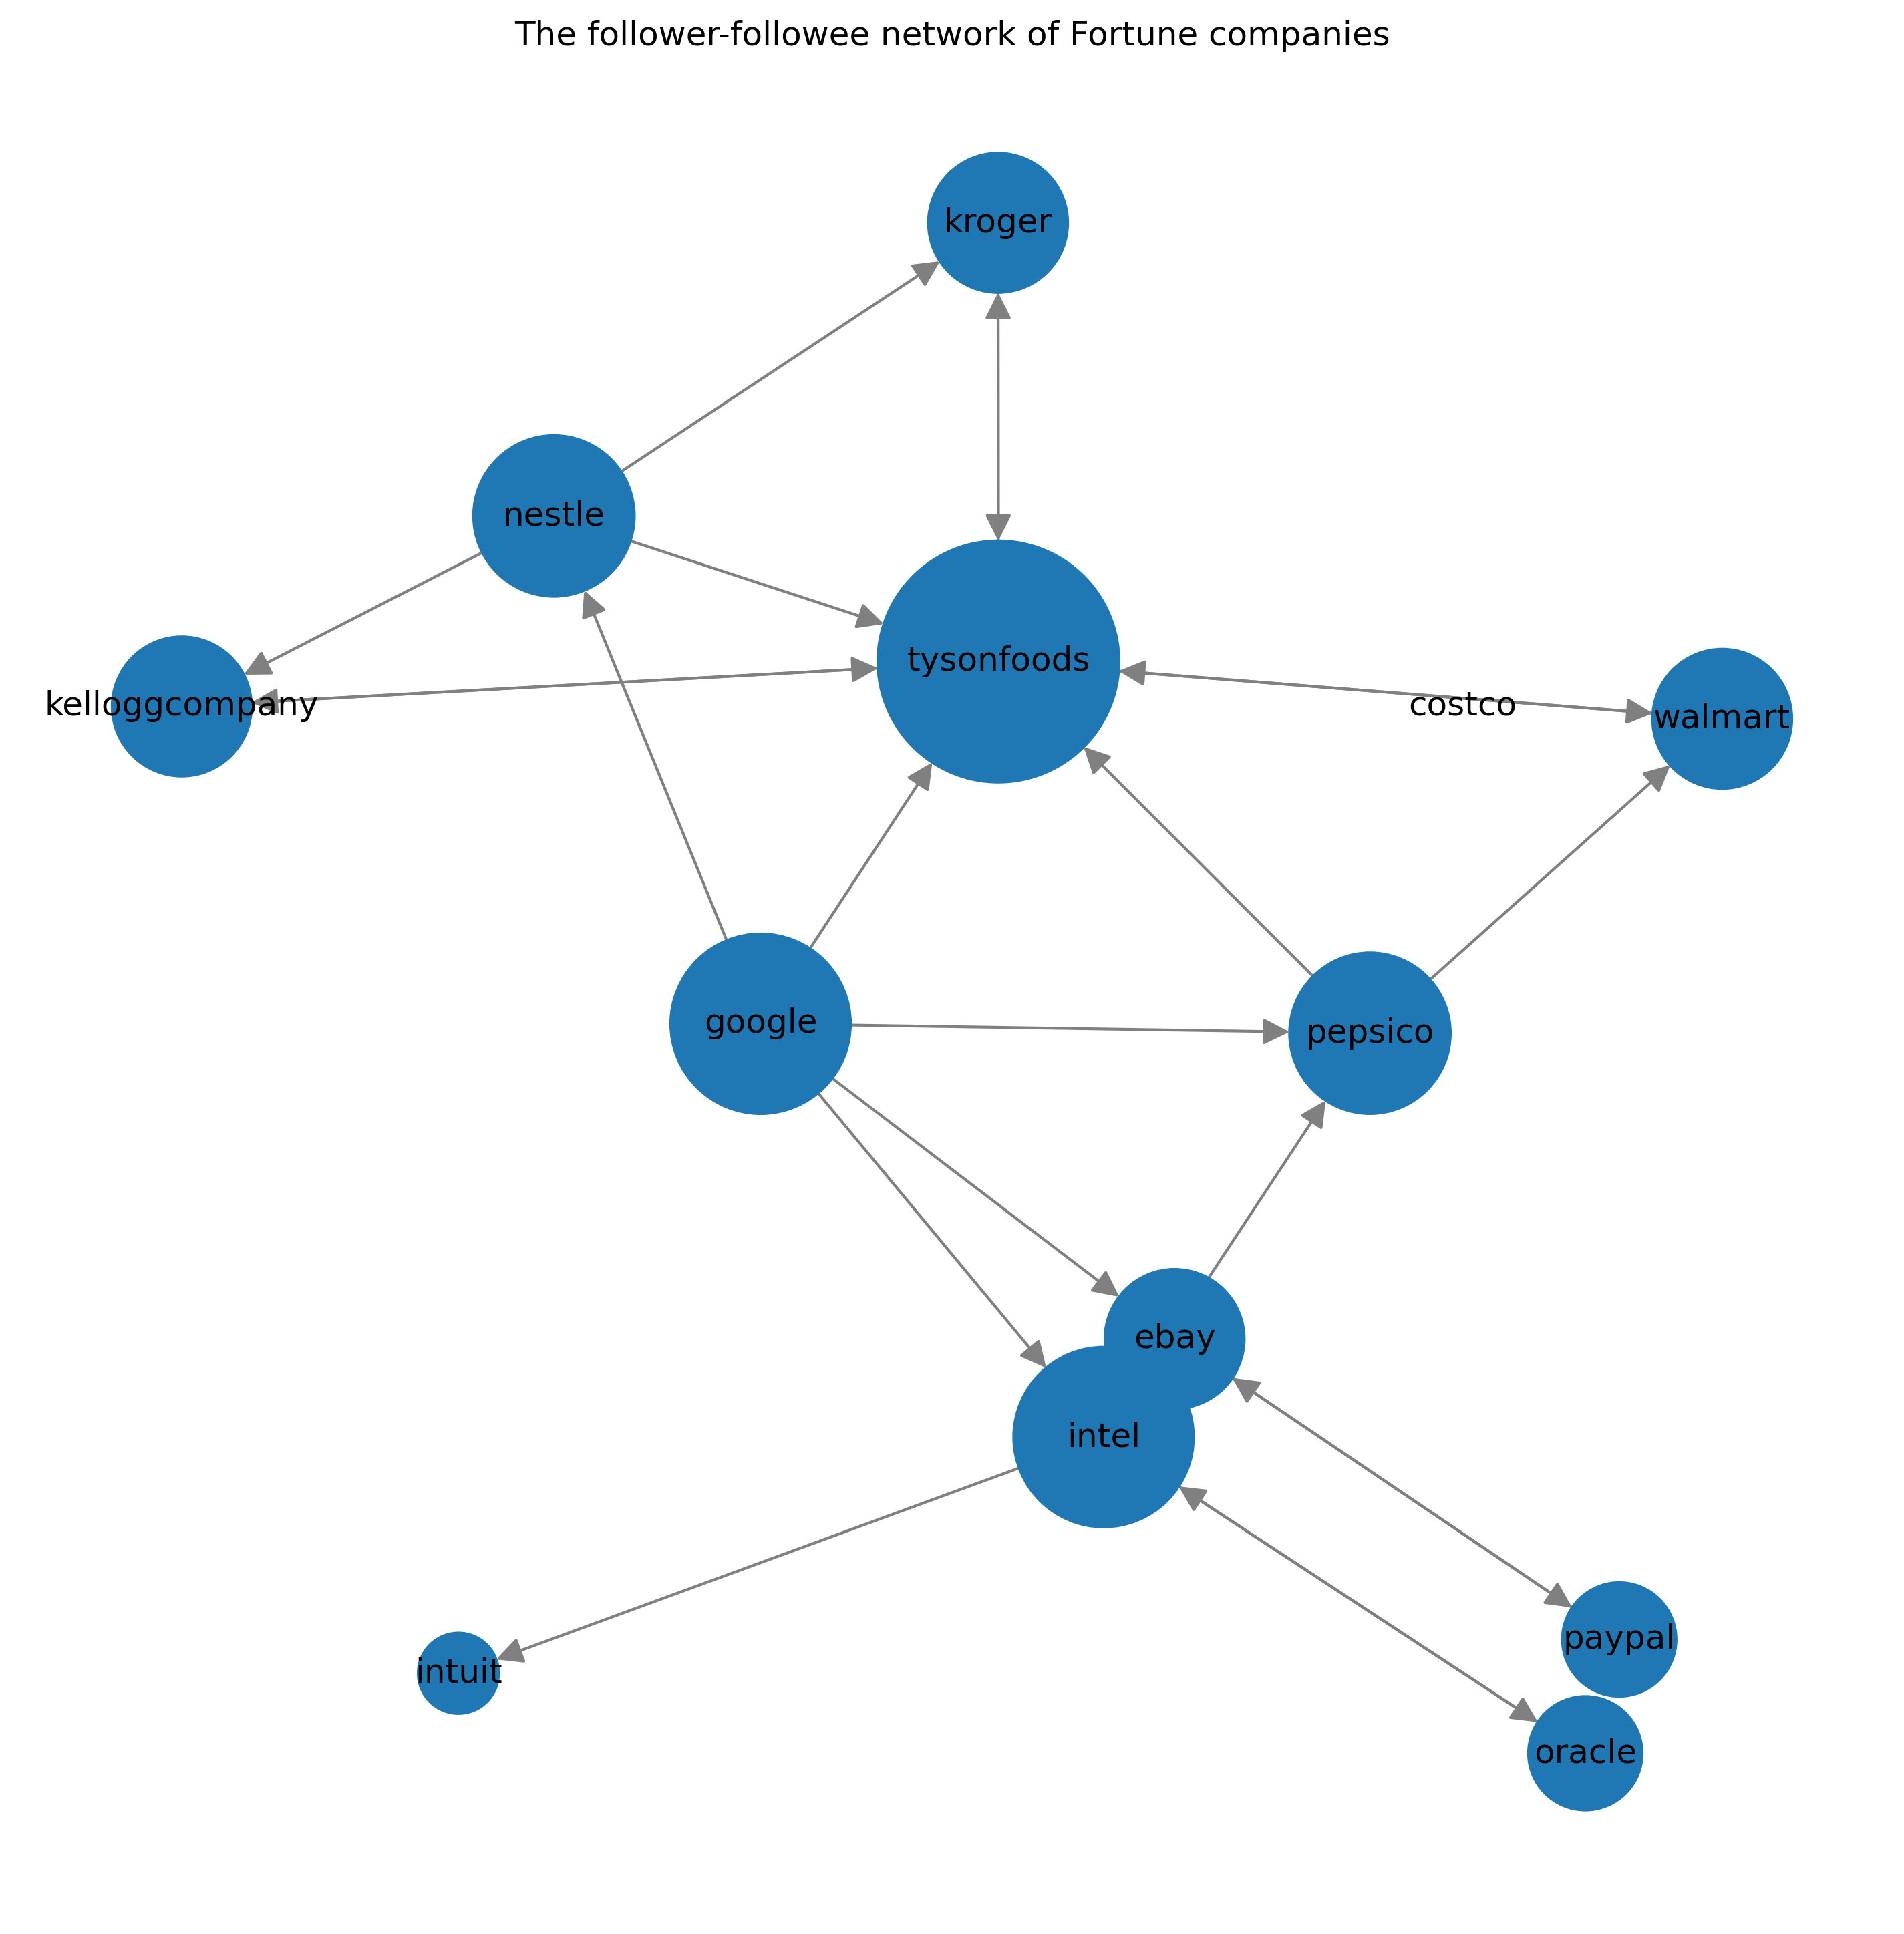

In [21]:

# Build a network from the adjacency matrix
tb = pd.read_csv("tb.csv", header=0, index_col=0)


# Visualize
G = nx.convert_matrix.from_pandas_adjacency(tb, create_using=nx.DiGraph())
figure(figsize=(12, 12), dpi=300)

# node size proportional to degree
node_size = [x * 10000 for x in nx.degree_centrality(G).values()]

# choose a layout function
pos = nx.kamada_kawai_layout(G)

# edge color
edge_color = "grey"

# make arrows more obvious
arrowsize = 20

nx.drawing.nx_pylab.draw_networkx(G, node_size=node_size,
                                  pos=pos,
                                  arrowsize=arrowsize,
                                  edge_color=edge_color,
                                  with_labels=True,
                                  font_size=12)

plt.title('The follower-followee network of Fortune companies')
plt.axis("off")
plt.show()


In [22]:
import math
# calculate centrality
x = nx.degree_centrality(G)
print(x)

# sort
sortedList = {k: v for k, v in sorted(
    x.items(), key=lambda item: item[1], reverse=True)}
print(sortedList)
topTwo = list(sortedList.keys())[:2]
print(topTwo)


{'walmart': 0.25, 'tysonfoods': 0.75, 'costco': 0.0, 'kroger': 0.25, 'nestle': 0.3333333333333333, 'pepsico': 0.3333333333333333, 'kelloggcompany': 0.25, 'google': 0.41666666666666663, 'ebay': 0.25, 'intuit': 0.08333333333333333, 'intel': 0.41666666666666663, 'paypal': 0.16666666666666666, 'oracle': 0.16666666666666666}
{'tysonfoods': 0.75, 'google': 0.41666666666666663, 'intel': 0.41666666666666663, 'nestle': 0.3333333333333333, 'pepsico': 0.3333333333333333, 'walmart': 0.25, 'kroger': 0.25, 'kelloggcompany': 0.25, 'ebay': 0.25, 'paypal': 0.16666666666666666, 'oracle': 0.16666666666666666, 'intuit': 0.08333333333333333, 'costco': 0.0}
['tysonfoods', 'google']


## Q3 scrape tweets

- Define a functionn to scrape the most recent (e.g. make a 200 call) **original** (exclude retweets) tweets from multiple accouts.
- For each tweet, grab "id","created_at","full_text","user.screen_name".
- Make a dataframe and return the dataframe.
- Use the function to get the original tweets of the top twp accounts from Q2.


In [23]:
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_KEY, ACCESS_SECRET)
api = tweepy.API(auth, wait_on_rate_limit=True)


def get_all_tweets(user_names):
    all_tweets = []

    for name in user_names:
        alltweets = api.user_timeline(screen_name=name, count=200)
        all_tweets.extend([(tweet.id_str, tweet.created_at, tweet.text.encode("utf-8"),
                            tweet.user.screen_name) for tweet in alltweets])

    tb = pd.DataFrame(all_tweets)
    return tb


get_all_tweets(topTwo)


,0,1,2,3
0,1587096253720035330,2022-10-31 14:56:48+00:00,b'@Goatware Hi Jimmi -- Thank you for bringing...,TysonFoods
1,1587090499235618816,2022-10-31 14:33:56+00:00,b'@Calivegastan Hi -- Thank you for bringing t...,TysonFoods
2,1585278111809249280,2022-10-26 14:32:09+00:00,b'RT @Baylor: Joyce Lee (BBA \'93) came to Bay...,TysonFoods
3,1585276523212324866,2022-10-26 14:25:50+00:00,b'@TheDivineChelle Hi Divine -- Thank you for ...,TysonFoods
4,1585273148827631617,2022-10-26 14:12:26+00:00,b'@TheNerdyCatLady Hi Ranae -- Thank you for b...,TysonFoods
...,...,...,...,...
395,1585146240718835723,2022-10-26 05:48:09+00:00,b'@harunamo1234 Hi there. Have you already tri...,Google
396,1585144604378255364,2022-10-26 05:41:38+00:00,"b""@TausifR27657590 Hi Tausif. Let's see what w...",Google
397,1585049416892923904,2022-10-25 23:23:24+00:00,"b""@EmmaCFA1 Hi, Emma. You can use Hand Raise t...",Google
398,1585008566813048833,2022-10-25 20:41:05+00:00,b'Holiday travel season is just around the cor...,Google
